In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
%matplotlib inline
from casadi import *
from pdfo import *

In [2]:
n = 500
taux = 1/n

In [3]:
def Katja_Mombaur_DOC ( Xi, Xf, alpha1, alpha2, alpha3):
    xi = Xi[0] 
    yi = Xi[1]
    thetai = Xi[2]
    
    xf = Xf[0] 
    yf = Xf[1]
    thetaf = Xf[2]
    
    opti = casadi.Opti()   

    ## les positions
    x = opti.variable(n)
    y = opti.variable(n)
    theta = opti.variable(n)

    ## les vitesses 
    v1 = opti.variable(n)        ## vitesse latérale
    v2 = opti.variable(n)        ## vitesse orthogonal
    w = opti.variable(n)         ## vitesse angulaire
    
        ## les vitesses 
    u1 = opti.variable(n)        ## accélération latérale
    u3 = opti.variable(n)        ## accélération orthogonal
    u2 = opti.variable(n)        ## accélération angulaire
    
    
    
    opti.minimize(  taux*(alpha1 * dot(u1,u1) + alpha2 * dot(u2,u2 ) + alpha3 * dot( u3 ,u3 ) ) )    # ma fonction objetion

    # mes fonctions de contrainte d'égalité:

    ## pour les condition initial
    opti.subject_to( x[0] == xi + 10**(-4))        
    opti.subject_to( y[0] == yi + 10**(-4))
    opti.subject_to( theta[0] == thetai + 10**(-4))
    
    
    opti.subject_to( v1[0] == 0.0001 )
    opti.subject_to( w[0]  == 0.0001 )
    opti.subject_to( v2[0] == 0.0001 )
    opti.subject_to( v1[-1] == 0.0001 )
    opti.subject_to( w[-1]  == 0.0001 )
    opti.subject_to( v2[-1] == 0.0001 )
    
    opti.subject_to( u1[-1] == 0.0001 )
    opti.subject_to( u2[-1] == 0.0001 )
    opti.subject_to( u3[-1] == 0.0001 )
    opti.subject_to( u1[0] == 0.0001 )
    opti.subject_to( u2[0] == 0.0001 )
    opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
    opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
    opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
    opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
    opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )
    

    ## pour les conditions finales
    opti.subject_to( x[-1]==xf + 10**(-4))
    opti.subject_to( y[-1]==yf + 10**(-4))
    opti.subject_to( theta[-1]==thetaf + 10**(-4))


    p_opts = dict(print_time = False, verbose = False)
    s_opts = dict(print_level = 0)


    opti.solver('ipopt', p_opts,s_opts)    


    sol = opti.solve()
    
    
    X = sol.value(x)
    Y = sol.value(y)
    THETA = sol.value(theta)
    
    V1 = sol.value(v1)
    V2 = sol.value(v2)
    W = sol.value(w)
    
    U1 = sol.value(u1)
    U2 = sol.value(u2)
    U3 = sol.value(u3)
    
    return X,Y,THETA, V1,V2,W, U1,U2,U3

In [4]:
options = {'maxfev': 400  , 'rhoend' : 1e-6}

bounds1 = np.array([[0, 1], [0, 1] , [0, 1]])
lin_con1 = LinearConstraint([1, 1, 1], 1, 1)


def Mombaur (alpha) :
    (alpha1, alpha2, alpha3) = alpha
    print(alpha)
    
    mk = 0
    
    if alpha1 < 0 :
        alpha01 = - alpha1
        mk = mk - alpha1
    else : 
        alpha01 = alpha1
    
    if alpha2 < 0 :
        alpha02 = - alpha2
        mk = mk - alpha2
    else : 
        alpha02 = alpha2
        
    if alpha3 < 0 :
        alpha03 = - alpha3
        mk = mk - alpha3
    else : 
        alpha03 = alpha3
        
    
    opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

    ## les positions
    x = opti.variable(n)
    y = opti.variable(n)
    theta = opti.variable(n)

    ## les vitesses 
    v1 = opti.variable(n)        ## vitesse latérale
    v2 = opti.variable(n)        ## vitesse orthogonal
    w = opti.variable(n)         ## vitesse angulaire


    ## les accélération 
    u1 = opti.variable(n)        ## accélération latérale
    u3 = opti.variable(n)        ## accélération orthogonal
    u2 = opti.variable(n)        ## accélération angulaire


    opti.minimize(  taux*(alpha01 * dot(u1,u1) + alpha02 * dot(u2,u2 ) + alpha03 * dot( u3 ,u3 ) ) )    # ma fonction objetion

        # mes fonctions de contrainte d'égalité:

        ## pour les condition initial
    opti.subject_to( x[0] == X1[0] + 10**(-4))        
    opti.subject_to( y[0] == X2[0] + 10**(-4))
    opti.subject_to( theta[0] == THETA[0] + 10**(-4))
    
    opti.subject_to( v1[0] == 0.0001 )
    opti.subject_to( w[0]  == 0.0001 )
    opti.subject_to( v2[0] == 0.0001 )
    opti.subject_to( v1[-1] == 0.0001 )
    opti.subject_to( w[-1]  == 0.0001 )
    opti.subject_to( v2[-1] == 0.0001 )

        
    opti.subject_to( u1[-1] == 0.0001 )
    opti.subject_to( u2[-1] == 0.0001 )
    opti.subject_to( u3[-1] == 0.0001 )

    opti.subject_to( u1[0] == 0.0001 )
    opti.subject_to( u2[0] == 0.0001 )
    opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
    opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
    opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
    opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
    opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )


        ## pour les conditions finales
    opti.subject_to( x[-1]==X1[-1] + 10**(-4))
    opti.subject_to( y[-1]==X2[-1] + 10**(-4))
    opti.subject_to( theta[-1]==THETA[-1] + 10**(-4))


    opti.solver('ipopt')      # suivant la méthode de KKT

    sol = opti.solve()
    
    X1_1 = sol.value(x)
    X2_1 = sol.value(y)
    X3_1 = sol.value(theta)
    
    m01 = sqrt((np.linalg.norm(X1-X1_1)**2 + np.linalg.norm(X2-X2_1)**2 + np.linalg.norm(THETA-X3_1)**2 )/n)
    m02 = 10* abs (alpha1 + alpha2 + alpha3 -1)
    m03 = 10* mk
    
    m1 = m01+m02+m03
    
    return  m1   

In [5]:
Xi = [-4,-0.9,pi]
Xf = [0,0,pi/2]
alpha1 = 0.13
alpha2 = 0.72
alpha3 = 0.15

X1,X2,THETA,V1,W,V2,U1,U2,U3 = Katja_Mombaur_DOC ( Xi, Xf, alpha1, alpha2, alpha3)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [6]:
res = pdfo( Mombaur, [0.1 ,0.5, 0.4], bounds=bounds1, constraints=[lin_con1], options=options)
alpha1_,alpha2_,alpha3_ = res.x
X1M_PDFO,X2M_PDFO,X3M_PDFO, v1,w,v2,u1,u2,u3 = Katja_Mombaur_DOC ( Xi, Xf, alpha1_, alpha2_, alpha3_)

[0.1 0.5 0.4]
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e

   2  1.4180961e+02 1.26e-03 6.04e-01  -1.7 8.92e+01    -  1.00e+00 1.00e+00h  1
   3  1.2495453e+02 7.02e-04 1.72e-01  -1.7 2.29e+01    -  1.00e+00 1.00e+00F  1
   4  1.2288722e+02 3.12e-04 1.64e-02  -2.5 9.28e+00    -  1.00e+00 1.00e+00f  1
   5  1.2066507e+02 1.05e-06 7.67e-05  -3.8 6.34e-01    -  1.00e+00 1.00e+00f  1
   6  1.2066083e+02 1.54e-10 2.02e-08  -5.7 7.44e-03    -  1.00e+00 1.00e+00h  1
   7  1.2066083e+02 1.78e-15 1.42e-14  -9.0 7.48e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 7

                                   (scaled)                 (unscaled)
Objective...............:   1.2066082759869171e+02    1.2066082759869171e+02
Dual infeasibility......:   1.4210854715202004e-14    1.4210854715202004e-14
Constraint violation....:   1.7763568394002505e-15    1.7763568394002505e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   

   2  7.8178159e+01 1.97e-03 2.23e-01  -1.7 5.06e+01    -  1.00e+00 1.00e+00h  1
   3  8.1818362e+01 1.51e-04 2.07e-03  -1.7 7.18e+00    -  1.00e+00 1.00e+00h  1
   4  8.2274619e+01 7.29e-08 5.14e-06  -3.8 2.08e-01    -  1.00e+00 1.00e+00h  1
   5  8.2273975e+01 1.44e-13 5.15e-12  -8.6 1.28e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   8.2273974615644406e+01    8.2273974615644406e+01
Dual infeasibility......:   5.1478821205819258e-12    5.1478821205819258e-12
Constraint violation....:   1.4434807515950610e-13    1.4434807515950610e-13
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.1478821205819258e-12    5.1478821205819258e-12


Number of objective function evaluations             = 6
Number of objective gradient evaluations             =

   1  6.5303515e+01 2.33e-02 2.92e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  8.6617544e+01 2.11e-03 1.86e-01  -1.7 4.79e+01    -  1.00e+00 1.00e+00h  1
   3  9.0934113e+01 1.64e-04 2.68e-03  -2.5 7.53e+00    -  1.00e+00 1.00e+00h  1
   4  9.1693744e+01 6.31e-08 3.88e-06  -3.8 2.14e-01    -  1.00e+00 1.00e+00h  1
   5  9.1693171e+01 2.89e-14 3.05e-12  -8.6 1.00e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   9.1693171225089230e+01    9.1693171225089230e+01
Dual infeasibility......:   3.0464519795714295e-12    3.0464519795714295e-12
Constraint violation....:   2.8921309791485328e-14    2.8921309791485328e-14
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.0464519795714295e-12    3.0464519795714295e-12


Number of objective function e

   1  6.8066069e+01 2.33e-02 2.68e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  7.3842980e+01 6.32e-04 2.67e-02  -1.7 4.43e+01    -  1.00e+00 1.00e+00h  1
   3  7.4415925e+01 5.19e-06 4.54e-05  -3.8 6.91e-01    -  1.00e+00 1.00e+00h  1
   4  7.4445627e+01 4.04e-11 2.30e-09  -5.7 4.71e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   7.4445627042275447e+01    7.4445627042275447e+01
Dual infeasibility......:   2.3032651341736710e-09    2.3032651341736710e-09
Constraint violation....:   4.0406317181052032e-11    4.0406317181052032e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3032651341736710e-09    2.3032651341736710e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             =

   3  8.6502899e+01 2.93e-06 1.30e-04  -3.8 7.08e-01    -  1.00e+00 1.00e+00h  1
   4  8.6523163e+01 8.24e-11 5.65e-09  -5.7 3.03e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   8.6523163064792115e+01    8.6523163064792115e+01
Dual infeasibility......:   5.6522253544244450e-09    5.6522253544244450e-09
Constraint violation....:   8.2430701153768382e-11    8.2430701153768382e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.6522253544244450e-09    5.6522253544244450e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   3  8.4703576e+01 3.81e-05 5.25e-04  -2.5 2.72e+00    -  1.00e+00 1.00e+00h  1
   4  8.4936387e+01 1.74e-09 1.57e-07  -5.7 3.89e-02    -  1.00e+00 1.00e+00h  1
   5  8.4936387e+01 8.88e-16 3.55e-15  -8.6 5.64e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   8.4936387026790243e+01    8.4936387026790243e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality 

   5  8.5687768e+01 8.88e-16 3.55e-15  -8.6 1.79e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   8.5687768175363544e+01    8.5687768175363544e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 6
Number of inequality constraint Jacobian evaluations = 0
Number of La

   2  8.1714999e+01 1.04e-03 6.05e-02  -1.7 4.50e+01    -  1.00e+00 1.00e+00h  1
   3  8.3215362e+01 2.56e-05 3.09e-04  -2.5 2.05e+00    -  1.00e+00 1.00e+00h  1
   4  8.3375493e+01 1.03e-09 4.70e-08  -5.7 2.45e-02    -  1.00e+00 1.00e+00h  1
   5  8.3375494e+01 8.88e-16 3.55e-15  -8.6 1.51e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   8.3375493581808172e+01    8.3375493581808172e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             =

   4  8.1899101e+01 8.00e-10 3.63e-08  -5.7 2.18e-02    -  1.00e+00 1.00e+00h  1
   5  8.1899101e+01 8.88e-16 3.55e-15  -8.6 1.12e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   8.1899101339643622e+01    8.1899101339643622e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   2  8.0757300e+01 1.03e-03 7.31e-02  -1.7 4.53e+01    -  1.00e+00 1.00e+00h  1
   3  8.2388906e+01 2.86e-05 3.85e-04  -2.5 2.29e+00    -  1.00e+00 1.00e+00h  1
   4  8.2556978e+01 9.65e-10 8.81e-08  -5.7 2.90e-02    -  1.00e+00 1.00e+00h  1
   5  8.2556978e+01 8.88e-16 3.55e-15  -8.6 2.80e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   8.2556978409512354e+01    8.2556978409512354e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             =

   3  7.8539333e+01 2.38e-05 3.05e-04  -2.5 2.06e+00    -  1.00e+00 1.00e+00h  1
   4  7.8671104e+01 6.51e-10 5.85e-08  -5.7 2.41e-02    -  1.00e+00 1.00e+00h  1
   5  7.8671105e+01 8.88e-16 3.55e-15  -8.6 1.77e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   7.8671104769030549e+01    7.8671104769030549e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality 

   1  6.2911832e+01 2.33e-02 2.44e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  7.2759499e+01 8.41e-04 6.86e-02  -1.7 4.54e+01    -  1.00e+00 1.00e+00h  1
   3  7.3983267e+01 1.95e-05 2.45e-04  -2.5 1.87e+00    -  1.00e+00 1.00e+00h  1
   4  7.4080029e+01 3.46e-10 4.29e-08  -5.7 2.02e-02    -  1.00e+00 1.00e+00h  1
   5  7.4080029e+01 8.88e-16 3.55e-15  -8.6 1.19e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   7.4080028848615129e+01    7.4080028848615129e+01
Dual infeasibility......:   3.5527136788005009e-15    3.5527136788005009e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5527136788005009e-15    3.5527136788005009e-15


Number of objective function e

   2  6.0194493e+01 5.80e-04 6.32e-02  -2.5 4.58e+01    -  1.00e+00 1.00e+00h  1
   3  6.0877127e+01 1.01e-05 1.06e-04  -2.5 1.37e+00    -  1.00e+00 1.00e+00h  1
   4  6.0911250e+01 3.82e-11 1.17e-08  -5.7 1.11e-02    -  1.00e+00 1.00e+00h  1
   5  6.0911250e+01 8.88e-16 7.11e-15  -9.0 2.62e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   6.0911250446103367e+01    6.0911250446103367e+01
Dual infeasibility......:   7.1054273576010019e-15    7.1054273576010019e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1054273576010019e-15    7.1054273576010019e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             =

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  5.6313345e+01 2.33e-02 1.97e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  6.4329566e+01 6.07e-04 5.60e-02  -2.5 4.53e+01    -  1.00e+00 1.00e+00h  1
   3  6.5071277e+01 9.99e-06 1.06e-04  -2.5 1.29e+00    -  1.00e+00 1.00e+00h  1
   4  6.5111583e+0

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   1  5.6492585e+01 2.33e-02 2.00e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  6.5318789e+01 6.63e-04 6.33e-02  -2.5 4.55e+01    -  1.00e+00 1.00e+00h  1
   3  6.6174764e+01 1.25e-05 1.41e-04  -2.5 1.49e+00    -  1.00e+00 1.00e+00h  1
   4  6.6225522e+01 9.92e-11 1.75e-08  -5.7 1.33e-02    -  1.00e+00 1.00e+00h  1
   5  6.6225522e+01 8.88e-16 7.11e-15  -9.0 4.22e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   6.6225521911723803e+01    6.6225521911723803e+01
Dual infeasibility......:   7.1054273576010019e-15    7.1054273576010019e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1054273576010019e-15    7.1054273576010019e-15


Number of objective function e

   4  6.5993172e+01 9.40e-11 1.57e-08  -5.7 1.27e-02    -  1.00e+00 1.00e+00h  1
   5  6.5993172e+01 8.88e-16 7.11e-15  -9.0 3.77e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   6.5993171732076206e+01    6.5993171732076206e+01
Dual infeasibility......:   7.1054273576010019e-15    7.1054273576010019e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1054273576010019e-15    7.1054273576010019e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   5  6.5921452e+01 8.88e-16 7.11e-15  -9.0 4.03e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   6.5921452088745923e+01    6.5921452088745923e+01
Dual infeasibility......:   7.1054273576010019e-15    7.1054273576010019e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1054273576010019e-15    7.1054273576010019e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             = 6
Number of equality constraint evaluations            = 6
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 6
Number of inequality constraint Jacobian evaluations = 0
Number of La

   2  6.4938061e+01 6.47e-04 6.17e-02  -2.5 4.55e+01    -  1.00e+00 1.00e+00h  1
   3  6.5762749e+01 1.18e-05 1.32e-04  -2.5 1.45e+00    -  1.00e+00 1.00e+00h  1
   4  6.5810494e+01 9.11e-11 1.53e-08  -5.7 1.25e-02    -  1.00e+00 1.00e+00h  1
   5  6.5810494e+01 8.88e-16 7.11e-15  -9.0 3.65e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   6.5810493881695621e+01    6.5810493881695621e+01
Dual infeasibility......:   7.1054273576010019e-15    7.1054273576010019e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1054273576010019e-15    7.1054273576010019e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             =

   2  6.3889280e+01 6.24e-04 6.05e-02  -2.5 4.55e+01    -  1.00e+00 1.00e+00h  1
   3  6.4666294e+01 1.10e-05 1.20e-04  -2.5 1.39e+00    -  1.00e+00 1.00e+00h  1
   4  6.4709387e+01 7.52e-11 1.31e-08  -5.7 1.17e-02    -  1.00e+00 1.00e+00h  1
   5  6.4709387e+01 8.88e-16 7.11e-15  -9.0 3.08e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 5

                                   (scaled)                 (unscaled)
Objective...............:   6.4709387054014670e+01    6.4709387054014670e+01
Dual infeasibility......:   7.1054273576010019e-15    7.1054273576010019e-15
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1054273576010019e-15    7.1054273576010019e-15


Number of objective function evaluations             = 6
Number of objective gradient evaluations             =

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   3  5.4028086e+01 6.40e-07 5.62e-06  -3.8 2.33e-01    -  1.00e+00 1.00e+00h  1
   4  5.4025619e+01 1.30e-12 4.09e-11  -8.6 6.50e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4025619184968690e+01    5.4025619184968690e+01
Dual infeasibility......:   4.0863312733563362e-11    4.0863312733563362e-11
Constraint violation....:   1.2958523143424827e-12    1.2958523143424827e-12
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.0863312733563362e-11    4.0863312733563362e-11


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   1  4.9838864e+01 2.33e-02 1.50e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.5307127e+01 3.83e-04 3.68e-02  -2.5 4.50e+01    -  1.00e+00 1.00e+00h  1
   3  5.5649850e+01 3.62e-06 2.77e-05  -2.5 7.25e-01    -  1.00e+00 1.00e+00h  1
   4  5.5661124e+01 8.43e-12 7.93e-10  -5.7 3.62e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5661124497840262e+01    5.5661124497840262e+01
Dual infeasibility......:   7.9295503496723541e-10    7.9295503496723541e-10
Constraint violation....:   8.4280082912613352e-12    8.4280082912613352e-12
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.9295503496723541e-10    7.9295503496723541e-10


Number of objective function evaluations             = 5
Number of objective gradient evaluations             =

   3  5.5933953e+01 5.32e-06 4.58e-05  -2.5 9.45e-01    -  1.00e+00 1.00e+00h  1
   4  5.5949858e+01 1.30e-11 2.47e-09  -5.7 5.64e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5949858273024006e+01    5.5949858273024006e+01
Dual infeasibility......:   2.4664110753747082e-09    2.4664110753747082e-09
Constraint violation....:   1.3043094382325648e-11    1.3043094382325648e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4664110753747082e-09    2.4664110753747082e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   3  5.5913727e+01 5.90e-06 5.22e-05  -2.5 1.02e+00    -  1.00e+00 1.00e+00h  1
   4  5.5931052e+01 1.37e-11 3.27e-09  -5.7 6.37e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5931052021802650e+01    5.5931052021802650e+01
Dual infeasibility......:   3.2746001465966401e-09    3.2746001465966401e-09
Constraint violation....:   1.3694018141663378e-11    1.3694018141663378e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.2746001465966401e-09    3.2746001465966401e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.8709532e+01 2.33e-02 1.45e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.5498009e+01 4.45e-04 4.92e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.5939501e+01 5.68e-06 4.98e-05  -2.5 9.90e-01    -  1.00e+00 1.00e+00h  1
   4  5.5956317e+01 1.36e-11 2.96e-09  -5.7 6.10e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5956316682099555e+01    5.5956316682099555e+01
Dual infeasibility......:   2.9573996584986162e-09    2.9573996584986162e-09
Constraint violation....:   1.3556628042366015e-11    1.3556628042366015e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.8673119e+01 2.33e-02 1.45e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.5474989e+01 4.46e-04 4.93e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.5916986e+01 5.70e-06 5.00e-05  -2.5 9.92e-01    -  1.00e+00 1.00e+00h  1
   4  5.5933830e+0

   3  5.5886504e+01 5.68e-06 4.97e-05  -2.5 9.90e-01    -  1.00e+00 1.00e+00h  1
   4  5.5903267e+01 1.34e-11 2.96e-09  -5.7 6.10e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5903266909466531e+01    5.5903266909466531e+01
Dual infeasibility......:   2.9585400795895112e-09    2.9585400795895112e-09
Constraint violation....:   1.3425011102796702e-11    1.3425011102796702e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9585400795895112e-09    2.9585400795895112e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   3  5.5775248e+01 5.62e-06 4.91e-05  -2.5 9.85e-01    -  1.00e+00 1.00e+00h  1
   4  5.5791785e+01 1.31e-11 2.89e-09  -5.7 6.04e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5791785255646346e+01    5.5791785255646346e+01
Dual infeasibility......:   2.8947582109140058e-09    2.8947582109140058e-09
Constraint violation....:   1.3101963958206397e-11    1.3101963958206397e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8947582109140058e-09    2.8947582109140058e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   1  4.8231841e+01 2.33e-02 1.42e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.4907422e+01 4.34e-04 4.84e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.5329997e+01 5.41e-06 4.66e-05  -2.5 9.66e-01    -  1.00e+00 1.00e+00h  1
   4  5.5345654e+01 1.19e-11 2.65e-09  -5.7 5.82e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.5345654209040909e+01    5.5345654209040909e+01
Dual infeasibility......:   2.6512303463732678e-09    2.6512303463732678e-09
Constraint violation....:   1.1876055694415300e-11    1.1876055694415300e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.6512303463732678e-09    2.6512303463732678e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             =

   3  5.4380800e+01 4.95e-06 4.12e-05  -2.5 9.21e-01    -  1.00e+00 1.00e+00h  1
   4  5.4394616e+01 9.56e-12 2.15e-09  -5.7 5.32e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4394616434755299e+01    5.4394616434755299e+01
Dual infeasibility......:   2.1473880451594596e-09    2.1473880451594596e-09
Constraint violation....:   9.5605745542570730e-12    9.5605745542570730e-12
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1473880451594596e-09    2.1473880451594596e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.7722831e+01 2.33e-02 1.39e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.4254838e+01 4.22e-04 4.74e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4655856e+01 5.10e-06 4.30e-05  -2.5 9.37e-01    -  1.00e+00 1.00e+00h  1
   4  5.4670239e+0

   2  5.4259357e+01 4.22e-04 4.76e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4661627e+01 5.13e-06 4.33e-05  -2.5 9.40e-01    -  1.00e+00 1.00e+00h  1
   4  5.4676080e+01 1.02e-11 2.34e-09  -5.7 5.52e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4676079839771909e+01    5.4676079839771909e+01
Dual infeasibility......:   2.3443362806574441e-09    2.3443362806574441e-09
Constraint violation....:   1.0242084957923225e-11    1.0242084957923225e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3443362806574441e-09    2.3443362806574441e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality 

   3  5.4665841e+01 5.10e-06 4.30e-05  -2.5 9.37e-01    -  1.00e+00 1.00e+00h  1
   4  5.4680240e+01 1.02e-11 2.31e-09  -5.7 5.49e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4680240314573979e+01    5.4680240314573979e+01
Dual infeasibility......:   2.3144295369093015e-09    2.3144295369093015e-09
Constraint violation....:   1.0229234126413189e-11    1.0229234126413189e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3144295369093015e-09    2.3144295369093015e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   1  4.7722216e+01 2.33e-02 1.39e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.4252767e+01 4.22e-04 4.74e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4653652e+01 5.10e-06 4.29e-05  -2.5 9.37e-01    -  1.00e+00 1.00e+00h  1
   4  5.4668027e+01 1.02e-11 2.31e-09  -5.7 5.48e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4668026829455904e+01    5.4668026829455904e+01
Dual infeasibility......:   2.3072530552781245e-09    2.3072530552781245e-09
Constraint violation....:   1.0200007505289932e-11    1.0200007505289932e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3072530552781245e-09    2.3072530552781245e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             =

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

   3  5.4626513e+01 5.08e-06 4.28e-05  -2.5 9.35e-01    -  1.00e+00 1.00e+00h  1
   4  5.4640837e+01 1.01e-11 2.29e-09  -5.7 5.47e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4640837178456465e+01    5.4640837178456465e+01
Dual infeasibility......:   2.2941541999443871e-09    2.2941541999443871e-09
Constraint violation....:   1.0137168882096148e-11    1.0137168882096148e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2941541999443871e-09    2.2941541999443871e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   3  5.4615783e+01 5.08e-06 4.27e-05  -2.5 9.35e-01    -  1.00e+00 1.00e+00h  1
   4  5.4630086e+01 1.01e-11 2.29e-09  -5.7 5.47e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4630086327689575e+01    5.4630086327689575e+01
Dual infeasibility......:   2.2887221007295011e-09    2.2887221007295011e-09
Constraint violation....:   1.0110356996051451e-11    1.0110356996051451e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2887221007295011e-09    2.2887221007295011e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evalua

   1  4.7688967e+01 2.33e-02 1.38e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.4212276e+01 4.21e-04 4.73e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4611956e+01 5.08e-06 4.27e-05  -2.5 9.35e-01    -  1.00e+00 1.00e+00h  1
   4  5.4626261e+01 1.01e-11 2.29e-09  -5.7 5.47e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4626260895675962e+01    5.4626260895675962e+01
Dual infeasibility......:   2.2906014862655866e-09    2.2906014862655866e-09
Constraint violation....:   1.0106110392982259e-11    1.0106110392982259e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2906014862655866e-09    2.2906014862655866e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             =

   2  5.4211517e+01 4.21e-04 4.73e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4611130e+01 5.08e-06 4.27e-05  -2.5 9.35e-01    -  1.00e+00 1.00e+00h  1
   4  5.4625431e+01 1.01e-11 2.29e-09  -5.7 5.47e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4625430591745626e+01    5.4625430591745626e+01
Dual infeasibility......:   2.2889921069690899e-09    2.2889921069690899e-09
Constraint violation....:   1.0103390346571928e-11    1.0103390346571928e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2889921069690899e-09    2.2889921069690899e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality 

   1  4.7690325e+01 2.33e-02 1.38e-01  -1.0 2.45e+01    -  1.00e+00 1.00e+00h  1
   2  5.4211875e+01 4.21e-04 4.73e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4611433e+01 5.08e-06 4.27e-05  -2.5 9.35e-01    -  1.00e+00 1.00e+00h  1
   4  5.4625730e+01 1.01e-11 2.29e-09  -5.7 5.46e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4625730305146078e+01    5.4625730305146078e+01
Dual infeasibility......:   2.2872548299801565e-09    2.2872548299801565e-09
Constraint violation....:   1.0102668701605921e-11    1.0102668701605921e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2872548299801565e-09    2.2872548299801565e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             =

   2  5.4211801e+01 4.21e-04 4.73e-02  -2.5 4.56e+01    -  1.00e+00 1.00e+00h  1
   3  5.4611356e+01 5.08e-06 4.27e-05  -2.5 9.35e-01    -  1.00e+00 1.00e+00h  1
   4  5.4625653e+01 1.01e-11 2.29e-09  -5.7 5.46e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 4

                                   (scaled)                 (unscaled)
Objective...............:   5.4625653117876077e+01    5.4625653117876077e+01
Dual infeasibility......:   2.2872121974160109e-09    2.2872121974160109e-09
Constraint violation....:   1.0102529923727843e-11    1.0102529923727843e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2872121974160109e-09    2.2872121974160109e-09


Number of objective function evaluations             = 5
Number of objective gradient evaluations             = 5
Number of equality constraint evaluations            = 5
Number of inequality 

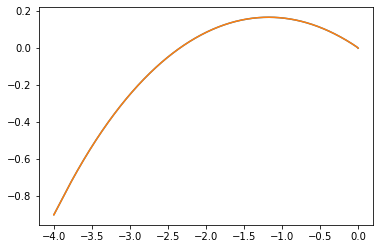

In [7]:
plt.plot(X1,X2)
plt.plot(X1M_PDFO,X2M_PDFO)